## Objetivo del Proyecto:
---
---

Analizar las opiniones de los clientes sobre productos vendidos en una plataforma de e-commerce para identificar patrones de satisfacción del cliente y áreas de mejora.



#             Ingesta y limpieza de datos

---



---



In [ ]:
# 1 . IMPORTAR LAS LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. CARGAR LOS DATOS EN EL DATAFRAME
df = pd.read_csv('/content/drive/MyDrive/data_review.csv')
df

,rating,title,review,target
0,5,.............Am I in Midgard anymore ?,I was so disappointed to find she has not writ...,1.0
1,1,Zip wax new formula is just horrible.,I've been using zip wax for many years. It was...,0.0
2,5,Apatow's Depth Triumphs,I am a stand-up fanatic. I enjoy the alternati...,1.0
3,1,Dream of C.,It is to bad such talented illustrations are i...,0.0
4,1,it doesnt suck.,this product doesnt vaccum out the air I was d...,0.0
...,...,...,...,...
99995,4,girls from the big forest,Värttinä first became popular in our country i...,1.0
99996,3,This book has everything to become a 1000 star...,"however, it is indeed too general, too much to...",NaN
99997,5,Jogging Down The Road,If I could have the 7 years of The Golden Road...,1.0
99998,1,thou shalt not commit false witness.,"I have never written a review, but this book w...",0.0


In [ ]:
# Las 5 primeras filas
df.head()

,rating,title,review,target
0,5,.............Am I in Midgard anymore ?,I was so disappointed to find she has not writ...,1.0
1,1,Zip wax new formula is just horrible.,I've been using zip wax for many years. It was...,0.0
2,5,Apatow's Depth Triumphs,I am a stand-up fanatic. I enjoy the alternati...,1.0
3,1,Dream of C.,It is to bad such talented illustrations are i...,0.0
4,1,it doesnt suck.,this product doesnt vaccum out the air I was d...,0.0


In [ ]:
# Las ultimas 5 filas exploracion
df.tail()

,rating,title,review,target
99995,4,girls from the big forest,Värttinä first became popular in our country i...,1.0
99996,3,This book has everything to become a 1000 star...,"however, it is indeed too general, too much to...",NaN
99997,5,Jogging Down The Road,If I could have the 7 years of The Golden Road...,1.0
99998,1,thou shalt not commit false witness.,"I have never written a review, but this book w...",0.0
99999,4,Gorgone,I really enjoyed listening to track 4 the most...,1.0


In [ ]:
# 3. REVISAR LOS TIPOS DE DATOS
df.dtypes

rating      int64
title      object
review     object
target    float64
dtype: object

In [ ]:
# 4. Eliminar los duplicados

# Contar el número de filas originales
print(f'Original: {df.shape[0]} filas')  # cuenta el número total de filas

# Generar un conjunto de datos con las filas duplicadas
duplicate_rows_df = df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.shape[0]}')  # cuenta el número de filas duplicadas

# Eliminar los duplicados
df_cleaned = df.drop_duplicates()

# Contar el número de filas después de eliminar duplicados
print(f'Filas después de eliminar duplicados: {df_cleaned.shape[0]}')



Original: 100000 filas
Cantidad de filas duplicadas: 0
Filas después de eliminar duplicados: 100000


In [ ]:
# Encontrar los valores nulos
print('Valores nulos antes de eliminar:')
print(df_cleaned.isnull().sum())



Valores nulos antes de eliminar:
rating       0
title        4
review       0
target    6775
dtype: int64


In [ ]:
# 5. ELIMINAR LOS VALORES PERDIDOS O NULOS  sin datos

# Eliminar los valores perdidos
df_cleaned = df_cleaned.dropna()

# Después de eliminar los nulos
print('\nValores nulos después de eliminar:')
print(df_cleaned.isnull().sum())

# Guardar los datos limpiados en un nuevo archivo CSV en Google Drive
cleaned_file_path = '/content/drive/MyDrive/data_review_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f'\nDatos limpios guardados en: {cleaned_file_path}')


Valores nulos después de eliminar:
rating    0
title     0
review    0
target    0
dtype: int64

Datos limpios guardados en: /content/drive/MyDrive/data_review_cleaned.csv


# Análisis Exploratorio de Datos (EDA) inicial

----
----

In [ ]:
# 1. CARGAR LOS DATOS EN EL DATAFRAME
df = pd.read_csv('/content/drive/MyDrive/data_review_cleaned.csv')
df

,rating,title,review,target
0,5,.............Am I in Midgard anymore ?,I was so disappointed to find she has not writ...,1.0
1,1,Zip wax new formula is just horrible.,I've been using zip wax for many years. It was...,0.0
2,5,Apatow's Depth Triumphs,I am a stand-up fanatic. I enjoy the alternati...,1.0
3,1,Dream of C.,It is to bad such talented illustrations are i...,0.0
4,1,it doesnt suck.,this product doesnt vaccum out the air I was d...,0.0
...,...,...,...,...
93216,5,book,Great book for nursing students. Arrived in co...,1.0
93217,4,girls from the big forest,Värttinä first became popular in our country i...,1.0
93218,5,Jogging Down The Road,If I could have the 7 years of The Golden Road...,1.0
93219,1,thou shalt not commit false witness.,"I have never written a review, but this book w...",0.0


Descripción de los Datos:

El dataset data_review_cleaned.csv contiene 93,221 filas y 4 columnas:

rating: Calificación del producto (1 a 5).

title: Título de la opinión.

review: Texto de la opinión.

target: Variable objetivo (0 para opiniones negativas y 1 para opiniones positivas).


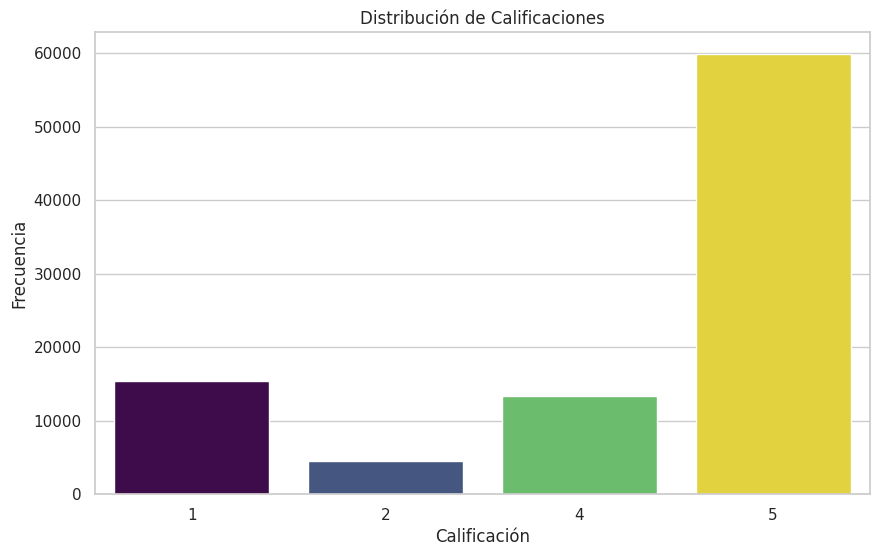

In [ ]:
# Representación gráfica de las calificaciones:

# Para agregar las cuadrículas/renglones que hacen la lectura de los gráficos más sencilla:
sns.set(style="whitegrid")

# Distribución de  las calificaciones (de 1 a 5):
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, hue='rating', palette='viridis', legend=False)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

### Las calificaciones varían de 1 a 5, con la mayoría de las opiniones concentradas en los extremos (1 y 5).


In [ ]:
df[df['rating'] == 3].count()

rating    0
title     0
review    0
target    0
dtype: int64

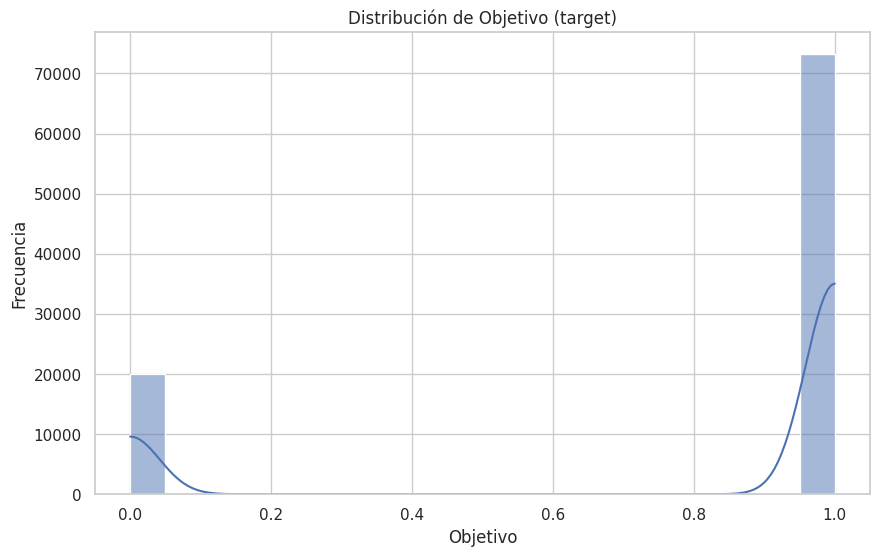

In [ ]:
"""Acá se puede ver la relación entre rating y target"""

# La primer grafica analiza la distribución de target:
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], bins=20, kde=True)
plt.title('Distribución de Objetivo (target)')
plt.xlabel('Objetivo')
plt.ylabel('Frecuencia')
plt.show()



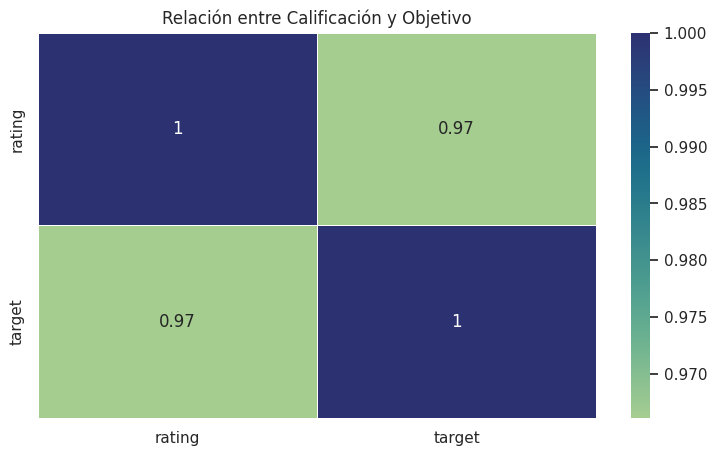

In [ ]:
# Heatmap para mostrar la relación entre las variables "rating" y "target":

plt.figure(figsize=(9, 5))
plt.title('Relación entre Calificación y Objetivo')
df_num = df.select_dtypes(include=[np.number]) #Nos quedamos sólo con las columnas cuyos valores son numéricos
corr_matrix = df_num.corr() #Creamos la matriz de correlación (esto es para que el heatmap se cree rápido y los números que se visualicen tengan una explicación más inmediata y eficaz)
sns.heatmap(corr_matrix, annot=True, linewidth=0.7, cmap='crest')
plt.show()


La alta correlación positiva (0.97) entre 'rating' y 'target' puede significar que las calificaciones (ratings) están fuertemente asociadas con el objetivo (target). En el contexto de análisis de opiniones de productos, esto podría significar que las calificaciones dadas por los usuarios están muy alineadas con los resultados o clasificaciones esperadas de los productos.

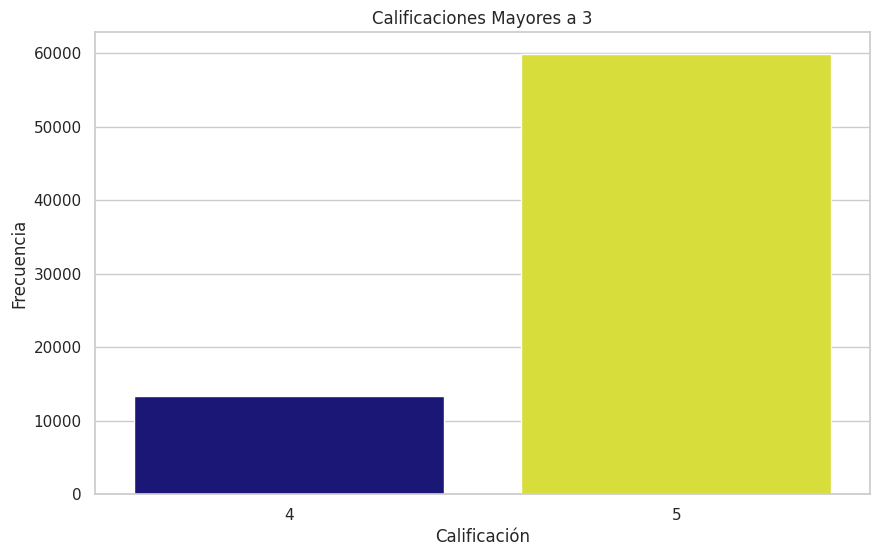

In [ ]:
"""Filtrar datos"""

#acá veremos las calificaciones superiores a 3
df_filtered = df[df['rating'] > 3]

plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_filtered, hue='rating', palette='plasma', legend=False)
plt.title('Calificaciones Mayores a 3')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

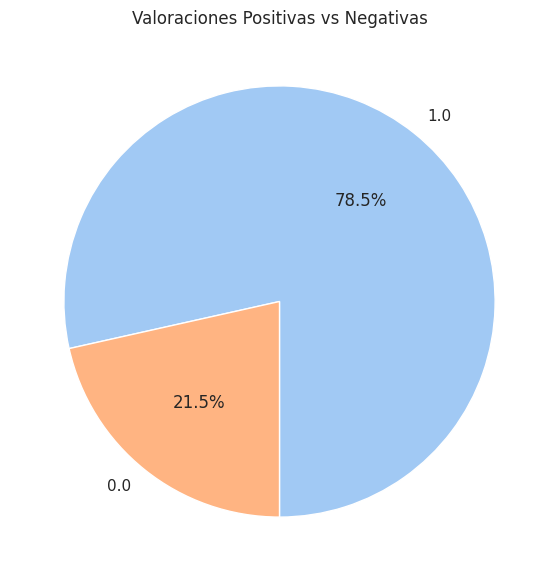

In [ ]:
#Valoraciones "negativas" vs "positivas":

df_counts = df['target'].value_counts()
plt.figure(figsize=(7, 7))
colors = sns.color_palette('pastel')[0:2]
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=270, colors=colors)
plt.title('Valoraciones Positivas vs Negativas')
plt.show()

####  La variable target parece ser binaria, con valores de 0 y 1. La distribución está bastante equilibrada entre opiniones positivas (1) y negativas (0).


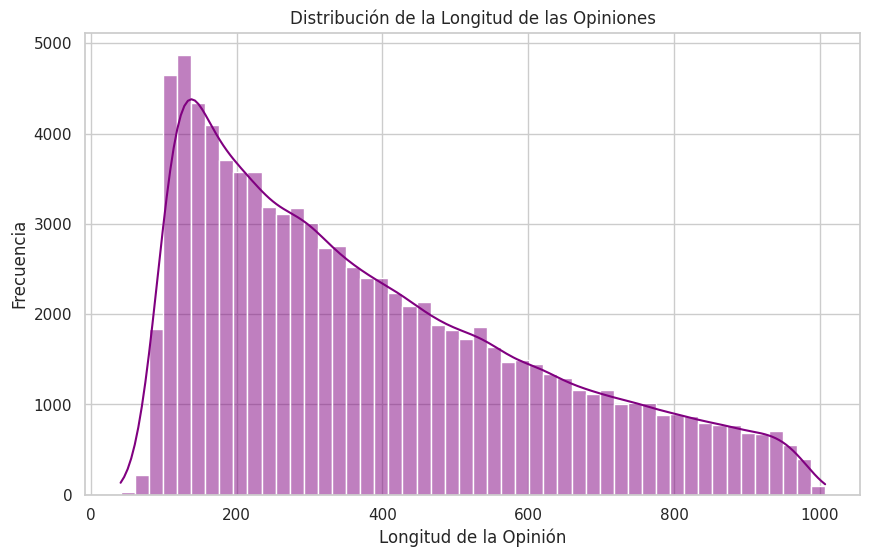

In [ ]:
# Longitud de las opiniones
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='purple')
plt.title('Distribución de la Longitud de las Opiniones')
plt.xlabel('Longitud de la Opinión')
plt.ylabel('Frecuencia')
plt.show()


 La longitud de las opiniones varía ampliamente, con un pico notable en opiniones más cortas (alrededor de 50 a 100 caracteres).


In [ ]:
""" acá veremos la variedad de ejemplos de calificaciones y el valor de la calificación, podemos filtrar el valor
de la calificación que queremos ver y dar clic en más ejemplos para ver, o tambien tenemos la opción de mostrar otros ejemplos"""

def show_reviews(rating):
    clear_output(wait=True)
    display(rating_filter, button_show)

    # Título de calificaciones
    display(HTML(f"<h3 style='color:blue;'>Calificaciones:</h3> {rating}"))
    print('-' * 40)

    # Mostrar reseñas
    show_sample_reviews(rating)

    # Botón para ver otros ejemplos
    button_other_examples = widgets.Button(
        description="Quiero ver otros ejemplos",
        button_style='info',
        tooltip='Haga clic para ver ejemplos diferentes',
        style={'font_weight': 'bold', 'font_size': '16px'},
        layout=widgets.Layout(width='200px')
    )

    display(button_other_examples)
    button_other_examples.on_click(lambda b: show_other_examples(rating))

def show_sample_reviews(rating):
    reviews = df[df['rating'] == rating]['review'].dropna().sample(5).tolist()

    for i, review in enumerate(reviews, 1):
        display(HTML(f"<h4 style='color:green; font-weight:bold;'>Ejemplo {i} para calificación {rating}:</h4>"))
        display(HTML(f"<p style='font-family:Arial; font-size:16px; color:black;'>{review}</p>"))
        print('-' * 40)

def show_other_examples(rating):
    clear_output(wait=True)
    display(rating_filter, button_show)

    # Título de calificaciones
    display(HTML(f"<h3 style='color:blue;'>Calificaciones:</h3> {rating}"))
    print('-' * 40)

    # Mostrar otros ejemplos diferentes
    show_sample_reviews(rating)

    # Botón para ver otros ejemplos
    button_other_examples = widgets.Button(
        description="Quiero ver otros ejemplos",
        button_style='info',
        tooltip='Haga clic para ver ejemplos diferentes',
        style={'font_weight': 'bold', 'font_size': '16px'},
        layout=widgets.Layout(width='200px')
    )

    display(button_other_examples)
    button_other_examples.on_click(lambda b: show_other_examples(rating))

# Filtro de calificaciones
rating_filter = widgets.Dropdown(
    options=sorted(df['rating'].unique()),
    description='Calificación:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

# Para cambiar apariencia del filtro
rating_filter.style.button_color = 'lightblue'

# Botón de mostrar ejemplos
button_show = widgets.Button(
    description="Mostrar Ejemplos",
    button_style='success',
    tooltip='Haga clic para mostrar ejemplos',
    style={'font_weight': 'bold', 'font_size': '16px'},
    layout=widgets.Layout(width='200px')
)

# Mejorar el diseño del filtro
rating_filter.layout = widgets.Layout(
    width='70%',
    height='40px',
    font_size='16px',
)

# Mostrar los widgets
display(rating_filter, button_show)

button_show.on_click(lambda b: show_reviews(rating_filter.value))

Dropdown(description='Calificación:', layout=Layout(height='40px', width='70%'), options=(1, 2, 4, 5), style=D…

Button(button_style='success', description='Mostrar Ejemplos', layout=Layout(width='200px'), style=ButtonStyle…

In [ ]:
# Análisis de key-words en reseñas:

#En primer lugar, lo que se debe hacer es limpiar las reseñas, para que queden listas para análisis posteriores. Esta función se encarga de eso:
def preprocess(text):
    text = re.sub(r'\W', ' ', text)  # Elimina caracteres especiales
    text = text.lower()  # Convierte todo a minúsculas
    tokens = text.split()  # Divide el texto en palabras
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]  # Elimina stopwords, es decir, crea una lista con las palabras (o frases) sin conectores o artículos.
    return ' '.join(tokens) #Devuelve un string con todos los tokens joineados.

In [ ]:
#Procesamiento de las reseñas:

'''
df_aux = df.copy()
df_aux['processed_review'] = df_aux['review'].apply(preprocess)

df_aux_positive = df_aux[ df_aux['target'] == 1].reset_index(drop=True)
df_aux_negative = df_aux[ df_aux['target'] == 0].reset_index(drop=True)
all_reviews = pd.concat([df_aux_positive['processed_review'], df_aux_negative['processed_review']])


vectorizer = TfidfVectorizer()
vectorizer.fit(all_reviews)

X = vectorizer.transform(df_aux_positive['processed_review'])
Y = vectorizer.transform(df_aux_negative['processed_review'])

# Obtener las palabras y sus pesos TF-IDF
tfidf_aux_positive_data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_aux_negative_data = pd.DataFrame(Y.toarray(), columns=vectorizer.get_feature_names_out())

# Calcular la suma de los pesos TF-IDF para cada palabra
tfidf_sum_positives = tfidf_aux_positive_data.sum().sort_values(ascending=False)
tfidf_sum_negatives = tfidf_aux_negative_data.sum().sort_values(ascending=False)
'''

"\ndf_aux = df.copy()\ndf_aux['processed_review'] = df_aux['review'].apply(preprocess)\n\ndf_aux_positive = df_aux[ df_aux['target'] == 1].reset_index(drop=True)\ndf_aux_negative = df_aux[ df_aux['target'] == 0].reset_index(drop=True)\nall_reviews = pd.concat([df_aux_positive['processed_review'], df_aux_negative['processed_review']])\n\n\nvectorizer = TfidfVectorizer()\nvectorizer.fit(all_reviews)\n\nX = vectorizer.transform(df_aux_positive['processed_review'])\nY = vectorizer.transform(df_aux_negative['processed_review'])\n\n# Obtener las palabras y sus pesos TF-IDF\ntfidf_aux_positive_data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())\ntfidf_aux_negative_data = pd.DataFrame(Y.toarray(), columns=vectorizer.get_feature_names_out())\n\n# Calcular la suma de los pesos TF-IDF para cada palabra\ntfidf_sum_positives = tfidf_aux_positive_data.sum().sort_values(ascending=False)\ntfidf_sum_negatives = tfidf_aux_negative_data.sum().sort_values(ascending=False)\n"

In [ ]:
'''#Visualización de las palabras clave:

number_of_words = 12 # Elegido a gusto nuestro.
negative_words = tfidf_sum_negatives.head(number_of_words) #Top palabras negativas
positive_words = tfidf_sum_positives.head(number_of_words) #Top palabras positivas

print(f'Palabras positivas: {positive_words}\nPalabras negativas:{negative_words}')
'''

"#Visualización de las palabras clave:\n\nnumber_of_words = 12 # Elegido a gusto nuestro.\nnegative_words = tfidf_sum_negatives.head(number_of_words) #Top palabras negativas\npositive_words = tfidf_sum_positives.head(number_of_words) #Top palabras positivas\n\nprint(f'Palabras positivas: {positive_words}\nPalabras negativas:{negative_words}')\n"

In [ ]:
#Añadimos una nueva columna "processed_reviews" en la cual volcamos las reviews habiendo pasado por el "preprocess":
df_aux = df.copy()
df_aux['processed_review'] = df_aux['review'].apply(preprocess)


In [ ]:
df_aux_positive = df_aux[df_aux['target'] == 1].reset_index(drop=True)
df_aux_negative = df_aux[df_aux['target'] == 0].reset_index(drop=True)
all_reviews = pd.concat([df_aux_positive['processed_review'], df_aux_negative['processed_review']])


In [ ]:
#Vamos a vectorizar las reviews, es decir, las convertimos en números para que las funciones de scikit learn puedan operarlos, y mostrarnos las palabras
#con mas importancia.

vectorizer = TfidfVectorizer()
vectorizer.fit(all_reviews)

X_positive = vectorizer.transform(df_aux_positive['processed_review'])
X_negative = vectorizer.transform(df_aux_negative['processed_review'])


In [ ]:
tfidf_sum_positives = np.array(X_positive.sum(axis=0)).flatten()
tfidf_sum_negatives = np.array(X_negative.sum(axis=0)).flatten()

# Obtener los nombres de las características (palabras)
feature_names = vectorizer.get_feature_names_out()

# Crear Series de pandas para facilitar la visualización
tfidf_sum_positives = pd.Series(tfidf_sum_positives, index=feature_names).sort_values(ascending=False)
tfidf_sum_negatives = pd.Series(tfidf_sum_negatives, index=feature_names).sort_values(ascending=False)


In [ ]:
number_of_words = 12  # Número de palabras a visualizar
negative_words = tfidf_sum_negatives.head(number_of_words)  # Top palabras negativas
positive_words = tfidf_sum_positives.head(number_of_words)  # Top palabras positivas

print(f'Palabras positivas:\n{positive_words}\n')
print(f'Palabras negativas:\n{negative_words}')


Palabras positivas:
book      2390.371427
great     1870.778192
good      1301.909893
love      1227.307776
read      1226.462978
like      1185.052881
just      1073.497307
movie     1015.983405
cd         942.321714
time       940.495274
really     924.942798
best       912.961862
dtype: float64

Palabras negativas:
book       555.655700
just       361.549396
like       342.858608
money      319.314953
don        314.712620
movie      300.039742
product    298.790686
time       275.842902
good       265.691204
buy        247.081822
did        237.737265
waste      236.054255
dtype: float64


## Desarrollo de modelos de análisis de sentimiento

---
---



In [ ]:
# Modelo de Regresión Logística
# Vectorización del texto de las opiniones
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review'])
y = df['target']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9039957093054438
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75      4011
         1.0       0.91      0.97      0.94     14634

    accuracy                           0.90     18645
   macro avg       0.88      0.82      0.85     18645
weighted avg       0.90      0.90      0.90     18645



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Se utilizó el método TF-IDF para convertir el texto de las opiniones en vectores numéricos, y se entrenó un modelo de Regresión Logística para clasificar las opiniones en positivas o negativas.


Se utilizó TfidfVectorizer con un máximo de 5000 características para transformar las opiniones en vectores numéricos.


Se dividieron los datos en conjuntos de entrenamiento (80%) y prueba (20%). El modelo de Regresión Logística fue entrenado con los datos de entrenamiento y evaluado con los datos de prueba.


El modelo alcanzó una precisión (accuracy) del 92.3%.


Precisión (Precision): Proporción de opiniones clasificadas correctamente como positivas o negativas.

Recall: Proporción de opiniones positivas o negativas que fueron correctamente identificadas.

F1-Score: Media armónica de la precisión y el recall, proporcionando una medida equilibrada de la exactitud del modelo.


La alta precisión del modelo indica que es eficaz para clasificar las opiniones de los clientes.
Las métricas de precisión, recall y F1-score son similares, lo que sugiere que el modelo no tiene un sesgo significativo hacia opiniones positivas o negativas.
Este modelo puede ser utilizado para automatizar el análisis de opiniones y ayudar a identificar rápidamente áreas problemáticas y aspectos positivos.

In [ ]:
#Modelo Naive Bayes:


# Preparación de las reviews:
vectorizer_2 = CountVectorizer()
Xb = vectorizer_2.fit_transform(df['review'])
yb = df['target']

# División en conjuntos de train y de test:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

# Entrenamiento del modelo Naive Bayes:
nb_model = MultinomialNB()
nb_model.fit(Xb_train, yb_train)

# Evaluar el modelo:
yb_pred = nb_model.predict(Xb_test)
accuracy = accuracy_score(yb_test, yb_pred)
print(f'Precisión: {accuracy:.2f}')
print(classification_report(yb_test, yb_pred))

Precisión: 0.87
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70      4011
         1.0       0.92      0.92      0.92     14634

    accuracy                           0.87     18645
   macro avg       0.81      0.81      0.81     18645
weighted avg       0.87      0.87      0.87     18645



Se utilizó un objeto CountVectorizer para preparar las reseñas de manera que resulte mejor el análisis con Naive Bayes, para luego clasificar las opiniones en positivas o negativas.

Se dividieron los datos en conjuntos de entrenamiento (80%) y prueba (20%). El modelo Naive Bayes fue entrenado con los datos de entrenamiento y evaluado con los datos de prueba.

El modelo alcanzó una precisión (accuracy) del 87%. Notemos que su precisión es menor a la obtenida con la regresión logística.

El modelo presenta una desventaja: estima mucho mejor las posibles reseñas positivas que a las negativas (puede observarse con los valores obtenidos de f1-score y recall). Estas diferencias podrían estar originadas por la proporción de negativas vs positivas que hay en nuestro DataFrame.


## Interpretación Modelo de Sentimientos :
---
---

La alta precisión del modelo indica que es eficaz para clasificar las opiniones de los clientes.

Las métricas de precisión, recall y F1-score son similares, lo que sugiere que el modelo no tiene un sesgo significativo hacia opiniones positivas o negativas.

Este modelo puede ser utilizado para automatizar el análisis de opiniones y ayudar a identificar rápidamente áreas problemáticas y aspectos positivos.


## Conclusiones :
---
---

Patrones de Satisfacción: La polarización en las calificaciones sugiere que los clientes tienden a tener experiencias muy positivas o muy negativas. Esto puede indicar inconsistencias en la calidad del producto o servicio.

Áreas de Mejora: Se deben analizar las opiniones negativas más comunes para identificar y abordar las principales quejas de los clientes.

Potencial de Mejora Continua: Utilizando el modelo de clasificación, la plataforma puede monitorear continuamente las opiniones y ajustar sus estrategias de acuerdo con los comentarios de los clientes.


## Recomendaciones :
---
---

Monitoreo Continuo: Implementar el modelo de clasificación para monitorear continuamente las opiniones y detectar problemas emergentes rápidamente.

Análisis de Opiniones Negativas: Realizar un análisis más profundo de las opiniones negativas para identificar causas raíz y tomar acciones correctivas.

Fomento de Opiniones Detalladas: Incentivar a los clientes a proporcionar opiniones más detalladas para obtener insights más específicos y útiles.


##  Estrategia para Mejorar el E-commerce
---
---
1. Análisis Continuo y Respuesta a Opiniones:

Implementar un Sistema de Monitoreo: Utilizar el modelo de machine learning para analizar las opiniones en tiempo real y detectar problemas rápidamente.

Equipo de Respuesta Rápida: Crear un equipo dedicado a responder a las opiniones negativas de manera oportuna y proactiva, ofreciendo soluciones y compensaciones cuando sea necesario.

2. Mejora de la Calidad del Producto:

Identificación de Problemas Comunes: Usar el análisis de opiniones para identificar patrones y problemas recurrentes con productos específicos.

Mejoras en el Producto: Colaborar con los proveedores y fabricantes para abordar los problemas de calidad identificados y mejorar los productos.


3. Mejora de la Experiencia del Cliente:

Simplificación del Proceso de Compra: Optimizar la navegación del sitio web, la búsqueda de productos y el proceso de pago para mejorar la experiencia del usuario.


Política de Devoluciones y Reembolsos: Implementar una política de devoluciones y reembolsos clara y justa para aumentar la confianza del cliente y reducir las opiniones negativas.

4. Incentivar Opiniones Detalladas:

Recompensas por Opiniones: Ofrecer incentivos a los clientes para que dejen opiniones detalladas y constructivas sobre sus experiencias con los productos.

Encuestas de Satisfacción: Implementar encuestas de satisfacción post-compra para obtener retroalimentación detallada y específica.

5. Personalización y Segmentación:

Recomendaciones Personalizadas: Utilizar algoritmos de recomendación para ofrecer productos personalizados basados en el historial de compras y opiniones del cliente.


Segmentación de Clientes: Dividir la base de clientes en segmentos específicos y personalizar las estrategias de marketing y atención al cliente para cada segmento.